In [2]:
import os
import shutil

os.chdir('..')

In [3]:
from keras.datasets import mnist
from snn_200_poisson import Model
from torch.utils.tensorboard import SummaryWriter
from brian2 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

In [ ]:
model = Model(100)

Гипотеза 1 - можно ли зафиксировать конец обучения по динамике весов?
Чтобы это проверить необходимо обучить сеть на одной картинке на много эпох и смотреть динамику рандомных весов в каждой эпохе (либо относительное изменение)

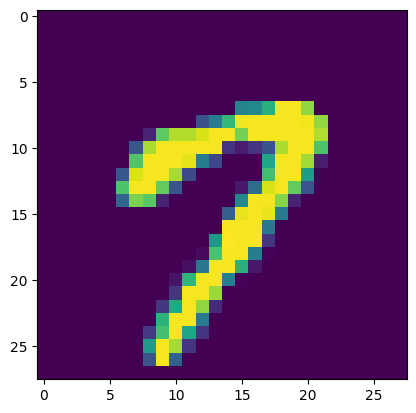

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = X_train[y_train == 0]
X_train = X_train[(y_train == 0) | (y_train == 7)]

X_train = X_train[:2]

train_pic = X_train[1]
plt.imshow(train_pic)

In [4]:
try:
    shutil.rmtree('/home/daniil_artamonov/projects/smallworld_snn/train')

except FileNotFoundError:
    pass

finally:
    os.mkdir('/home/daniil_artamonov/projects/smallworld_snn/train')
    os.mkdir('/home/daniil_artamonov/projects/smallworld_snn/train/conv_pic')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: '/home/daniil_artamonov/projects/smallworld_snn/train'

In [5]:
gmax = .05  # .01
def plot_w(S1M):
    plt.rcParams["figure.figsize"] = (20, 10)
    subplot(311)
    plot(S1M.t / ms, S1M.w.T / gmax)
    ylabel('w / wmax')
    subplot(312)
    plot(S1M.t / ms, S1M.Apre.T)
    ylabel('apre')
    subplot(313)
    plot(S1M.t / ms, S1M.Apost.T)
    ylabel('apost')
    tight_layout()
    show();

In [6]:
epochs = 10

In [1]:
model = Model(728, 100, True)

NameError: name 'Model' is not defined

In [8]:
model = Model(728, 100, True)

model.train([train_pic], epochs)

FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: 'c:\\Users\\User\\projects\\smallworld_snn/train/network_data'

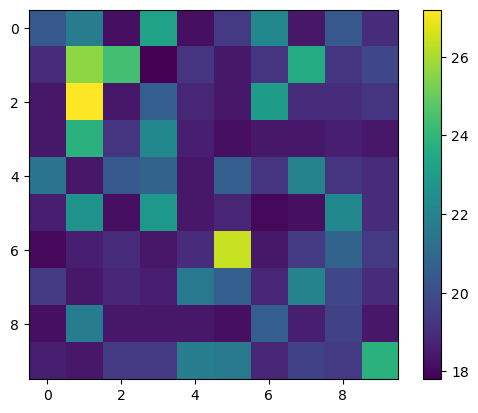

In [ ]:
spikes_ser = pd.Series(list(model['ESP'].i))

exc_rates_matrix = np.zeros(shape=(10, 10))
count = 0 

for i in range(10):
    for j in range(10):
        exc_rates_matrix[i, j] = spikes_ser[spikes_ser == count].shape[0] / (epochs * 0.5)
        count += 1

plt.colorbar(plt.imshow(exc_rates_matrix))

In [ ]:
spikes = list(model['ESP'].i)
print(spikes)
spikes.index(2)

[21, 11, 99, 49, 1, 3, 12, 17, 33, 65, 68, 88, 70, 81, 31, 40, 53, 58, 86, 51, 55, 74, 75, 95, 23, 47, 62, 67, 0, 18, 26, 45, 46, 64, 97, 5, 6, 8, 38, 43, 56, 69, 92, 27, 29, 72, 98, 10, 22, 24, 32, 36, 73, 84, 94, 16, 28, 44, 78, 90, 25, 48, 79, 61, 63, 9, 14, 15, 19, 20, 39, 42, 93, 30, 37, 54, 77, 89, 91, 41, 59, 87, 7, 76, 83, 50, 82, 34, 4, 52, 66, 85, 71, 96, 57, 80, 2, 13, 35, 60, 21, 99, 11, 3, 1, 17, 65, 88, 12, 68, 33, 49, 70, 31, 74, 81, 23, 40, 58, 26, 45, 53, 86, 46, 51, 75, 0, 47, 43, 62, 67, 29, 18, 5, 38, 55, 95, 28, 92, 6, 8, 24, 27, 10, 16, 69, 22, 32, 44, 64, 97, 72, 98, 56, 78, 20, 36, 42, 73, 77, 94, 37, 48, 14, 15, 84, 61, 79, 90, 91, 19, 30, 54, 25, 39, 76, 7, 41, 93, 63, 87, 89, 83, 50, 34, 59, 9, 82, 4, 66, 96, 57, 21, 35, 21, 3, 33, 99, 12, 11, 43, 95, 74, 31, 51, 40, 70, 88, 1, 42, 8, 10, 47, 65, 67, 18, 68, 0, 6, 17, 32, 64, 97, 46, 54, 81, 53, 72, 24, 92, 23, 29, 77, 86, 22, 27, 28, 38, 48, 55, 58, 14, 26, 62, 78, 16, 45, 49, 50, 87, 61, 73, 75, 30, 76, 19,

96

In [ ]:
os.chdir('train')

In [ ]:
# переписать в отдлельный скрипт

chk_list = os.listdir()
chk_list.sort()
chk_list.remove('conv_pic')
# chk_list.remove('conv_train.gif')

count = 0

for file in tqdm(chk_list):
    model.net.restore(name='train', filename=file)

    left_border = 0
    right_border = 100

    w_matrix = np.zeros(shape=(28, 28))
    exc_rates_matrix = np.zeros(shape=(10, 10))
    

    for i in np.arange(0, 28):
        for j in np.arange(0, 28):
            w_sum = np.sum(model['S1'].w[left_border:right_border])
            w_matrix[i, j] = w_sum

            left_border += 100
            right_border += 100

    spikes_ser = pd.Series(list(model['ESP'].i))
    count_neuron = 0

    for i in range(10):
        for j in range(10):
            exc_rates_matrix[i, j] = spikes_ser[spikes_ser == count_neuron].shape[0] / (epochs * 0.5)
            count_neuron += 1

    plt.figure(figsize=(15,8))
    plt.colorbar(plt.imshow(w_matrix))
    plt.title(f'Epoch{count}')
    plt.savefig(f'conv_pic/w_matrix_{count}.png')
    plt.close()

    plt.figure(figsize=(15,8))
    plt.colorbar(plt.imshow(exc_rates_matrix))
    plt.title(f'Epoch {count}')
    plt.savefig(f'conv_pic/rates_matrix_{count}.png')
    plt.close()

    count += 1

100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


In [ ]:
from PIL import Image

frames = []
 
for frame_number in range(0, epochs):
    frame = Image.open(f'conv_pic/rates_matrix_{frame_number}.png')
    frames.append(frame)

frames[0].save(
    'rates_train.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=300,
    loop=0
)

In [ ]:
from PIL import Image

frames = []
 
for frame_number in range(0, epochs):
    frame = Image.open(f'conv_pic/w_matrix_{frame_number}.png')
    frames.append(frame)

frames[0].save(
    'conv_train.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=300,
    loop=0
)

In [ ]:
len(model['ERM'].smooth_rate(window='flat', width=0.1 * ms))

45000

In [ ]:
sum_w_lst = []

writer = SummaryWriter('Model_1_raw') 

for i in tqdm(np.arange(len(model['S_SW_M'].w.T), step=500)):
    sum_w = np.sum(model['S_SW_M'].w.T[i])
    
    writer.add_scalar("Loss/train", sum_w, i)
    sum_w_lst.append(sum_w)

writer.flush()
writer.close()

KeyError: 'No object with name "S_SW_M" found'